Imports nécessaires:


In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Définition de l'ouverture carrée provoquant la diffracation:

In [16]:
def squareAperture(N,n): #the generated image will contain N*N pixels
    s=N
    spo= np.zeros((s,s))

    for x in range(1,s):
        for y in range(1,s):
            if x <=s/2+n and y<=s/2+n and x>=s/2-n and y>=s/2-n:
                spo[x][y]=1
            else:
                spo[x][y]=0
    return spo

Définition de la fonction de propagation:

In [17]:
#This function should propagate the input field of size Lx, Ly by a distance of z

def propagate(inputField, z, Lx, Ly): 
    Nx = len(inputField[0]) #number of pixels
    Ny = len(inputField)
    dx = Lx/Nx #size of a pixel
    dy = Ly/Ny

    FTinputField = np.fft.fft2(inputField)  #FFT of input

    FTinputField = np.fft.fftshift(FTinputField)

    X = [dx*k-Lx/2 for k in range(0,Nx)]
    Y = [dx*k-Ly/2 for k in range(0,Ny)]
    
    # We define hPropagation, the free space impulse response (eq 3.3-11 de P&B)
    
    hPropagation = np.array([[0+0j]*Nx]*Ny)
    for x in range(0,Nx):
        for y in range(0,Ny):
            hPropagation[x][y] = np.exp(-1j*k0*z)*1j*k0/(2*np.pi*z)*np.exp(-1j*k0*(X[x]**2+Y[y]**2)/(2*z))

    Hpropagation = np.fft.fft2(hPropagation) #FFT of hPropagation
    Hpropagation = np.fft.fftshift(Hpropagation)
    
    FToutputField = FTinputField*Hpropagation

    outputField = np.fft.ifft2(FToutputField) #iFFT of TFoutputfield
    outputField = np.fft.fftshift(outputField)
    return outputField

Définition des paramètres et affichage :

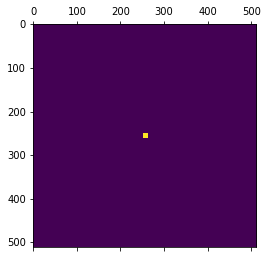

In [18]:
k0=2*np.pi/(0.5*10**-6) #définition du vecteur d'onde, avec lambda=0.5*10^-6m
z=40*10**-2 #on propage sur la distance z
L=2*10**-2 #l'image est de dimensions L*L
N=512 #N*N est le nombre de pixels de l'image
n=5 #la taille de la moitié du carré central
input = squareAperture(N,n)
plt.matshow(input)
plt.show()





In [ ]:
On propage et on affiche le résultat:

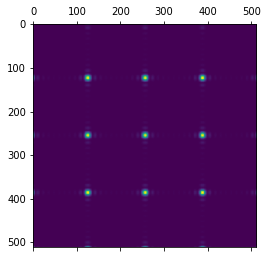

In [19]:
fieldAS = propagate(input,z,L,L)
plt.matshow(np.abs(fieldAS)**2)
plt.show()

Un zoom sur l'image obtenue montre qu'il s'agit bien de taches de diffractions, mais l'image semble périodisée.

In [ ]:
En augmentant z, ce phénomène diminue:

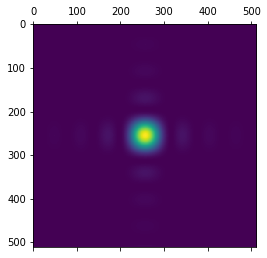

In [8]:
z=200*10**-2
fieldAS = propagate(input,z,L,L)
plt.matshow(np.abs(fieldAS)**2)
plt.show()

Plus intéressant, à z constant le phénomène disparait pour un nombre de pixel N suffisament important: (attention, ce calcul prend un peu de temps)

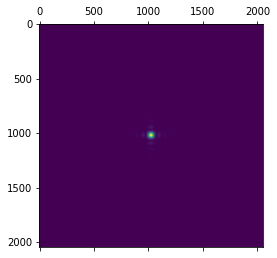

In [20]:
z=40*10**-2
N=2048 #On à muliplié le nombre de pixel par 4
n=20 #On multiplie n, le nombre de pixels de la moitiée du carré central par 4 pour que sa taille reste constante.
input = squareAperture(N,n)
fieldAS = propagate(input,z,L,L)
plt.matshow(np.abs(fieldAS)**2)
plt.show()


In [ ]:
A comparer avec:

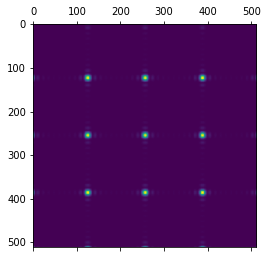

In [21]:
z=40*10**-2
N=512 #On à muliplié le nombre de pixel par 4
n=5 #On multiplie n, le nombre de pixels de la moitiée du carré central par 4 pour que sa taille reste constante.
input = squareAperture(N,n)
fieldAS = propagate(input,z,L,L)
plt.matshow(np.abs(fieldAS)**2)
plt.show()

Il pourrait s'agir d'un repliement de spectre causé par un non respect du critère de shannon, à priori sur la réponse impulsionnelle h, qui est la seule partie du code qui est obtenu par échantillonage.

Pour montrer que le phénomène observé est bien causé par un non respect du critère de shannon il est intéressant d'oberver le spectre d'une fonction 1D correspondant à h (la réponse impulsionnelle) sur un seul axe.

Ci dessous, nous tracons des graphiques representant le module de H pour des valeurs de z allans de 160cm à 20cm par pas de 10cm. On peut voir que lorsque z devient trop petit, le spectre de la réponse impulsionnelle h change drastiquement, ce qui semble prouver que le repliement spectral est la cause du problème.

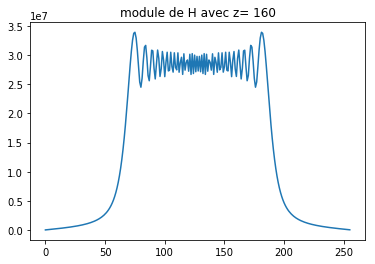

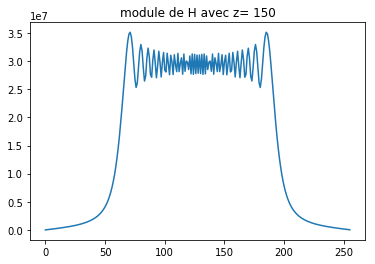

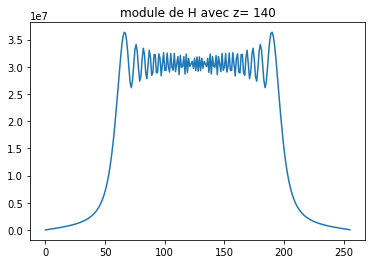

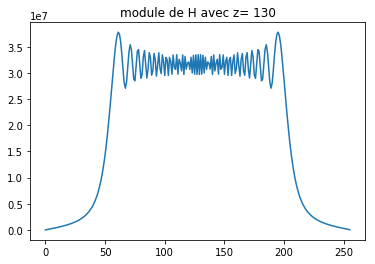

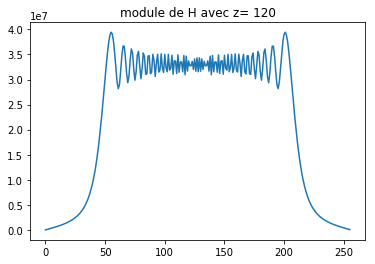

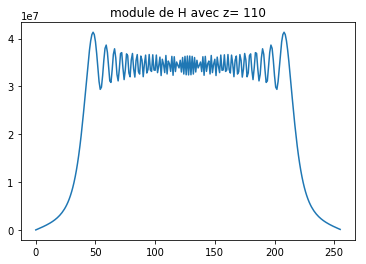

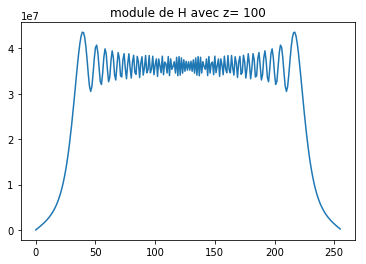

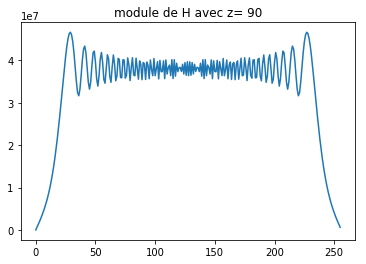

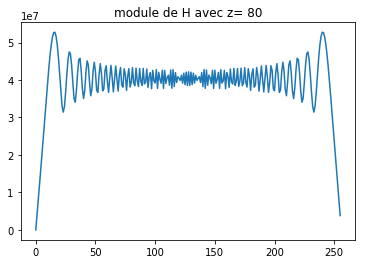

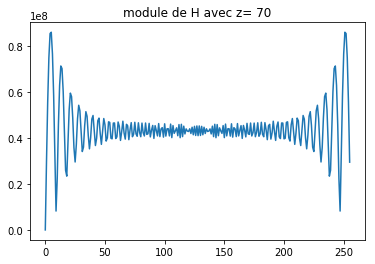

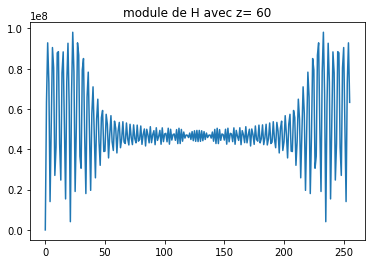

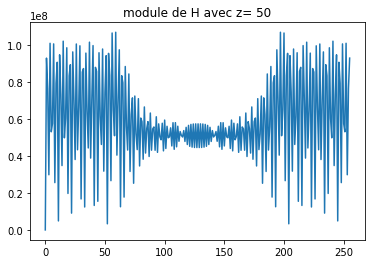

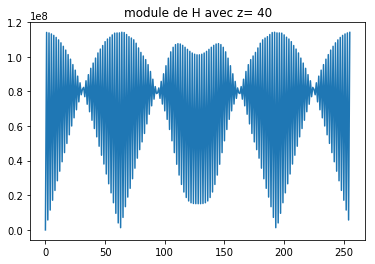

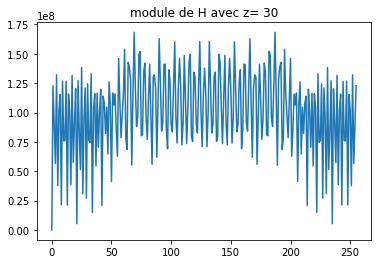

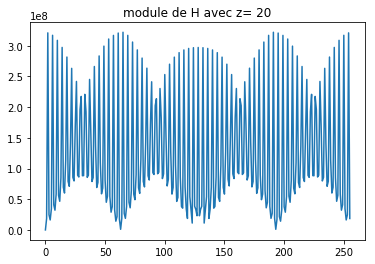

In [9]:
def h1d(N,k0,z,x) :
    h = np.array([0+0j]*N)
    for i in range(0,N) :
            h[i] = 1j*k0/(2*np.pi*z)*np.exp(-1j*k0/(2*z)*(x[i]**2))
    return h


plt.close("all")
#wave vector
lamda = 0.5*10**(-6)
k0 = 2*np.pi/lamda
#window size
L = 1*10**(-2)
#number of pixels along x
N = 256
#definition of x
x = np.linspace(-L/2,L/2,N)

for i in range(16,1,-1) :
    z = i*10*10**(-2)
    h = h1d(N,k0,z,x)
    H = np.fft.fft(h)
    H = np.fft.fftshift(H)
    plt.figure()
    plt.title("Module de H avec z= " + str(i*10))
    plt.plot(np.abs(H))